#PRACTICE CASE EDA DS DF IYKRA 6

import *data*

In [1]:
import pandas as pd

In [2]:
dataEDA=pd.read_csv('epl_1819.csv', sep=',')

#1. Is this data clean? 

View head of data

In [3]:
dataEDA.head()

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,23,72,98,25,27.1,20,1003200000,39987200,"26,581",112,"1,814","4,240",783,298,683,260,12,3,80,15,44,1,5,2,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,22,67,97,24,26.8,16,836440000,34848000,"23,638",98,"2,250","3,416",721,249,575,226,19,7,84,5,38,2,6,1,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,39,24,72,26,28.1,19,779460000,29981600,"25,070",146,"1,774","3,874",692,215,607,198,8,5,54,9,49,0,1,1,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,39,28,71,25,27.0,17,735240000,29409600,"21,295",87,"2,267","3,191",643,194,537,189,14,4,53,14,56,3,5,2,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,51,22,70,26,27.5,18,701800000,26989600,"20,805",65,"2,062","3,102",605,209,467,170,5,4,62,11,72,2,3,3,133,118,412,609,2,762,404,7,56.1,83.3


View summary data

In [4]:
dataEDA.describe()

,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,defence_goals_conceeded,general_goal_difference,general_points,general_squad_size,general_squad_average_age,general_squad_foreigners,finance _team_market,finance _market_average,attack_passes_through,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,general_card_yellow,general_card_red,attack_goals_counter,attack_goals_freekick,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
count,20.00000,20.000000,2.000000e+01,20.0,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,17.100000,1.228004e+08,38.0,15.450000,7.10000,15.450000,53.600000,53.600000,0.000000,53.450000,25.250000,27.490000,17.450000,3.750362e+08,1.498508e+07,58.700000,666.650000,195.350000,481.650000,165.550000,9.300000,4.200000,46.400000,7.250000,61.100000,2.350000,3.350000,1.150000,111.950000,127.750000,429.300000,646.250000,3.200000,429.400000,5.350000,49.995000,78.310000
std,5.91608,6.734827,1.821686e+07,0.0,7.250953,2.44734,6.778255,18.071204,15.752694,32.371202,21.007455,1.802776,0.938588,4.071402,2.821444e+08,1.127381e+07,33.625022,75.524325,34.776391,78.333481,39.323858,3.934998,2.546411,16.044018,4.165965,10.557611,1.424411,2.433862,1.136708,24.267099,37.160923,71.058982,65.310493,1.880649,84.536756,2.109502,6.387692,5.866129
min,1.00000,10.000000,9.662886e+07,38.0,3.000000,2.00000,1.000000,22.000000,22.000000,-54.000000,16.000000,20.000000,26.100000,10.000000,8.549200e+07,3.053600e+06,15.000000,562.000000,140.000000,360.000000,108.000000,4.000000,1.000000,17.000000,1.000000,38.000000,0.000000,0.000000,0.000000,58.000000,63.000000,314.000000,518.000000,0.000000,246.000000,1.000000,39.100000,63.900000
25%,5.75000,11.750000,1.069409e+08,38.0,10.750000,6.75000,12.250000,44.250000,46.000000,-20.750000,39.750000,25.000000,26.800000,15.500000,1.723480e+08,6.747400e+06,34.500000,612.500000,174.750000,440.000000,145.000000,6.500000,2.000000,38.500000,4.750000,55.750000,1.000000,1.000000,0.000000,94.750000,108.000000,364.250000,604.500000,2.000000,390.250000,4.750000,46.300000,75.550000
50%,10.50000,15.000000,1.213295e+08,38.0,14.500000,7.00000,16.000000,51.500000,53.500000,-2.500000,51.000000,25.500000,27.250000,18.000000,2.317260e+08,9.935200e+06,50.500000,640.500000,193.500000,472.000000,159.500000,9.500000,4.000000,44.000000,7.000000,59.500000,2.000000,3.000000,1.000000,113.500000,132.000000,434.500000,655.000000,3.500000,445.000000,5.000000,48.350000,78.150000
75%,15.25000,25.000000,1.422731e+08,38.0,19.500000,9.00000,19.250000,63.500000,65.750000,13.750000,67.000000,26.000000,28.150000,20.000000,5.882800e+08,2.326060e+07,78.000000,713.500000,209.250000,517.750000,185.250000,12.000000,5.000000,53.250000,10.000000,71.250000,4.000000,5.000000,2.000000,128.500000,147.250000,472.500000,702.500000,4.000000,499.250000,7.000000,54.000000,82.525000
max,20.00000,29.000000,1.524251e+08,38.0,32.000000,12.00000,28.000000,95.000000,81.000000,72.000000,98.000000,28.000000,29.700000,27.000000,1.003200e+09,3.998720e+07,146.000000,814.000000,298.000000,683.000000,260.000000,19.000000,10.000000,84.000000,15.000000,77.000000,5.000000,9.000000,3.000000,148.000000,222.000000,548.000000,730.000000,8.000000,564.000000,10.000000,64.000000,89.000000


View the number of columns and rows

In [ ]:
# check data shape
dataEDA.shape

(20, 44)

View type of data column

In [ ]:
#check data type
dataEDA.dtypes

Team                              object
category                          object
general_league_position            int64
finance _live_games_televised      int64
finance _tv_revenue                int64
general_matches_played             int64
general_won                        int64
general_draw                       int64
general_lost                       int64
attack_scored                      int64
defence_goals_conceeded            int64
general_goal_difference            int64
general_points                     int64
general_squad_size                 int64
general_squad_average_age        float64
general_squad_foreigners           int64
finance _team_market               int64
finance _market_average            int64
attack_passes                     object
attack_passes_through              int64
attack_passes_long                object
attack_passes_back                object
attack_crosses                     int64
attack_corners_taken               int64
attack_shots    

In [11]:
#remove comma in data
dataEDA= dataEDA.replace(",","", regex=True))

In [27]:
#change type object to int
dataEDA[['attack_passes','attack_passes_long','attack_passes_back','defence_clearances']]=dataEDA[['attack_passes','attack_passes_long','attack_passes_back','defence_clearances']].astype('int')

Missing Value

In [ ]:
x#check missing
dataEDA.isnull().sum()

Team                             0
category                         0
general_league_position          0
finance _live_games_televised    0
finance _tv_revenue              0
general_matches_played           0
general_won                      0
general_draw                     0
general_lost                     0
attack_scored                    0
defence_goals_conceeded          0
general_goal_difference          0
general_points                   0
general_squad_size               0
general_squad_average_age        0
general_squad_foreigners         0
finance _team_market             0
finance _market_average          0
attack_passes                    0
attack_passes_through            0
attack_passes_long               0
attack_passes_back               0
attack_crosses                   0
attack_corners_taken             0
attack_shots                     0
attack_shots_on_target           0
attack_goals_headed              0
attack_goals_penalty             0
attack_goals_box    

Data duplication

In [13]:
#check data duplicated
dataEDA.duplicated('Team').sum()

0

See the percentage of the number of outliers to the total amount of data

In [ ]:
#check outlier
Q1 = dataEDA.quantile(0.25)
Q3 = dataEDA.quantile(0.75)
IQR = Q3 - Q1

(((dataEDA < (Q1 - 1.5 * IQR)) | (dataEDA > (Q3 + 1.5 * IQR))).sum())/len(dataEDA)

Team                             0.00
attack_corners_taken             0.05
attack_crosses                   0.00
attack_goals_box                 0.10
attack_goals_counter             0.00
attack_goals_freekick            0.00
attack_goals_headed              0.00
attack_goals_outsidebox          0.00
attack_goals_penalty             0.05
attack_pass_accuracy             0.05
attack_passes                    0.00
attack_passes_back               0.00
attack_passes_long               0.00
attack_passes_through            0.05
attack_posession                 0.00
attack_scored                    0.05
attack_shots                     0.05
attack_shots_on_target           0.05
category                         0.00
defence_blocks                   0.05
defence_clearances               0.00
defence_clearances_headed        0.00
defence_goals_conceeded          0.00
defence_interceptions            0.00
defence_penalty_conceeded        0.05
defence_saves                    0.00
defence_tack

#2. How is the point distribution of the epl team? and which team is an anomaly?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Point Distribution Team EPL')]

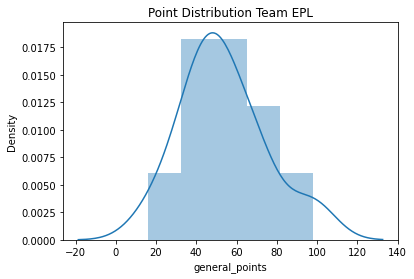

In [70]:
#make distribution plot
import seaborn as sns
sns.distplot(dataEDA['general_points']).set(title='Point Distribution Team EPL')

#3. Which team has the best attack? 

[Text(0.5, 1.0, 'Top Goals in EPL 18/19')]

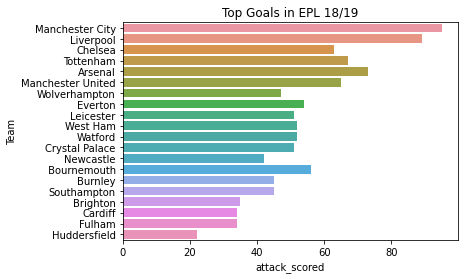

In [60]:
#plot team based on goals
sns.barplot(data=dataEDA, x="attack_scored", y="Team").set(title='Top Goals in EPL 18/19')

#4.	Which team has the best defence? 

[Text(0.5, 1.0, 'Goals conceded in Team EPL 18/19')]

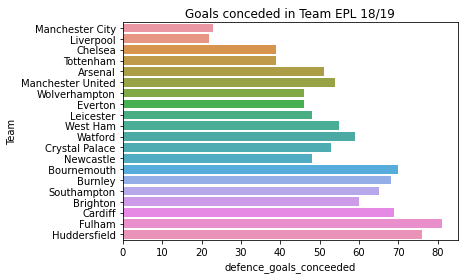

In [72]:
#plot team based on goals conceded
sns.barplot(data=dataEDA, x="defence_goals_conceeded", y="Team").set(title='Goals conceded in Team EPL 18/19')

#5.	Which team is good in the financial aspect? 

In [65]:
#sum total revenue
dataEDA['total_revenue']=dataEDA['finance _tv_revenue']+dataEDA['finance _team_market']+dataEDA['finance _market_average']

[Text(0.5, 1.0, 'Total revenue team in EPL 18/19')]

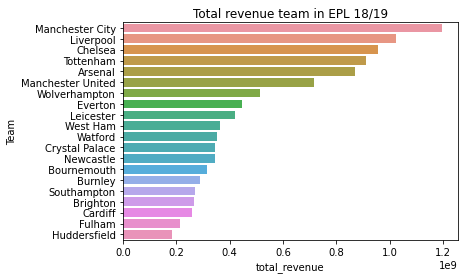

In [73]:
#plot team based on revenue
sns.barplot(data=dataEDA, x="total_revenue", y="Team").set(title='Total revenue team in EPL 18/19')

#6.	Explore your creativity!

View correlation of match results and revenue

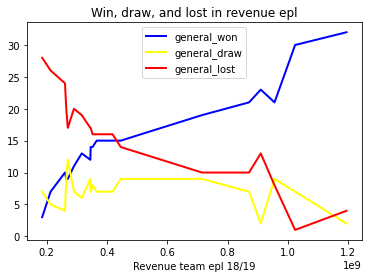

In [116]:
# multiple line plots
plt.plot( 'total_revenue', 'general_won', data=dataEDA, marker='', color='blue', linewidth=2)
plt.plot( 'total_revenue', 'general_draw', data=dataEDA, marker='', color='yellow', linewidth=2)
plt.plot( 'total_revenue', 'general_lost', data=dataEDA, marker='', color='red', linewidth=2)
# show legend
plt.legend()
plt.title('Win, draw, and lost in revenue epl')
plt.xlabel('Revenue team epl 18/19')

# show graph
plt.show()

View corelation squad conditions with team wins

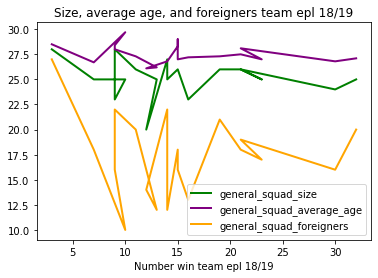

In [121]:
# multiple line plots
plt.plot( 'general_won', 'general_squad_size', data=dataEDA, marker='', color='green', linewidth=2)
plt.plot( 'general_won', 'general_squad_average_age', data=dataEDA, marker='', color='purple', linewidth=2)
plt.plot( 'general_won', 'general_squad_foreigners', data=dataEDA, marker='', color='orange', linewidth=2)
# show legend
plt.legend()
plt.title('Size, average age, and foreigners team epl 18/19')
plt.xlabel('Number win team epl 18/19')

# show graph
plt.show()